## pyCELP alignment vs density all (recreates left panel of Schad & Dima (2020) Figure 9) 

 - written by Tom Schad 

In [1]:
import numpy as np
import pycelp
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rkbgym')

In [2]:
##########################
## DO pycelp CALCULATIONS

fe14 = pycelp.Ion('fe_14',nlevels = 100)
fe13 = pycelp.Ion('fe_13',nlevels = 100)
fe11 = pycelp.Ion('fe_11',nlevels = 100)
si10 = pycelp.Ion('si_10',nlevels = 100)
si9  = pycelp.Ion('si_9')
models = fe14,fe11,fe13,fe13,si10,si9

wvls = 5303,7892,10746,10798,14301,39343
iontemps =  10.**np.array([6.3,6.1,6.25,6.25,6.15,6.05])

nd = 200
dens = 10.**np.linspace(5,11,nd)
py_align = np.zeros((6,nd,2))

for n in range(6):
    print(n)
    for d,dens0 in enumerate(dens):
        models[n].calc(dens0,iontemps[n],0.1,0,include_limbdark = True,include_protons = True)
        py_align[n,d,0] = models[n].get_upper_level_alignment(wvls[n])

        models[n].calc(dens0,iontemps[n],0.5,0,include_limbdark = True,include_protons = True)
        py_align[n,d,1] = models[n].get_upper_level_alignment(wvls[n])

 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.wgfa
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.scups
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.psplups
 using default abundances: /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 reading:  /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 testing default file: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 reading:  /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.wgfa
 reading:  /usr/

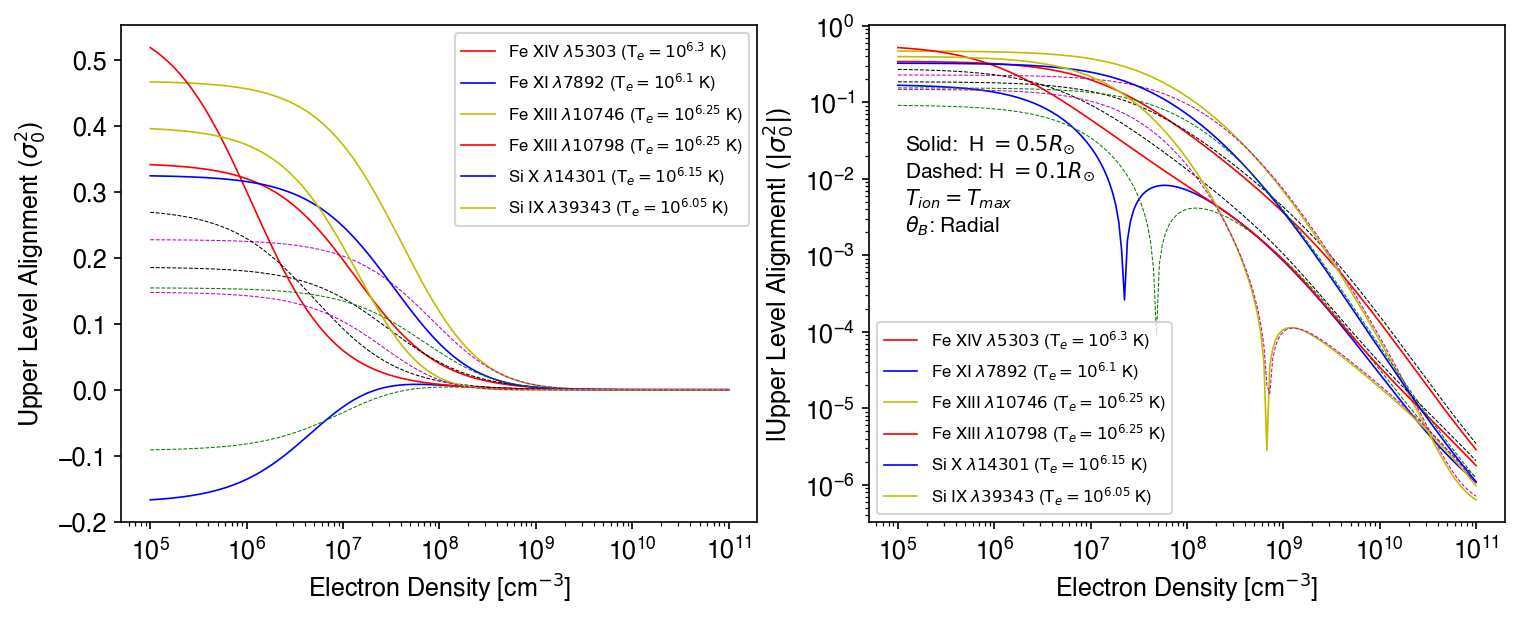

In [3]:
## plotting 
mpl.rcParams.update({
    "font.size":12,        
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

titles = r'Fe XIV $\lambda5303$ (T$_{e} = 10^{6.3}$ K)', \
        r'Fe XI $\lambda7892$ (T$_{e} = 10^{6.1}$ K)', \
        r'Fe XIII $\lambda10746$ (T$_{e} = 10^{6.25}$ K)',\
        r'Fe XIII $\lambda10798$ (T$_{e} = 10^{6.25}$ K)',\
        r'Si X $\lambda14301$ (T$_{e} = 10^{6.15}$ K)',\
        r'Si IX $\lambda39343$ (T$_{e} = 10^{6.05}$ K)',

width, height = plt.figaspect(0.4)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(width,height), dpi=150)
ax = ax.flatten()

for n in range(6):
    ax[0].plot(dens,py_align[n,:,1],lw = 0.8,label = titles[n])
    ax[0].plot(dens,py_align[n,:,0],linestyle = 'dashed',lw = 0.5)
    ax[1].plot(dens,np.abs(py_align[n,:,1]),lw = 0.8,label = titles[n])
    ax[1].plot(dens,np.abs(py_align[n,:,0]),linestyle = 'dashed',lw = 0.5)

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel('Upper Level Alignment ($\sigma^2_0$)')
ax[1].set_ylabel('|Upper Level Alignment| ($|\sigma^2_0|$)')
ax[0].set_xlabel(r'Electron Density [cm$^{-3}$]')
ax[1].set_xlabel(r'Electron Density [cm$^{-3}$]')

ax[0].legend(fontsize = 8)
ax[1].legend(fontsize = 8)

ax[1].text(1.2e5,2.e-3,
        r'Solid:  H $= 0.5R_{\odot}$' '\n'
        r'Dashed: H $= 0.1R_{\odot}$' '\n'
        r'$T_{ion} = T_{max}$' '\n'
        r'$\theta_{B}$: Radial',
        {'color': 'k', 'fontsize': 10})

fig.tight_layout(pad = 0.2)